In [ ]:
from google.colab import drive
drive.mount("/content/drive")
#/content/drive/MyDrive/BERT_PROJECTS/Playstore_app.csv

Mounted at /content/drive


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


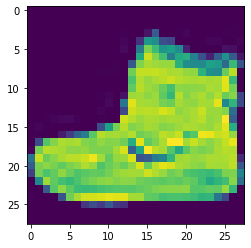

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0])

PREPROCESSING THE DATA

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

2D Convolutional layer, filters=32 and kernel_size=(4,4)
Pooling Layer where pool_size=(2,2)
Flatten Layer
Dense Layer(128 Neurons, activation: relu
Final Dense Layer(10, activation : softmax)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [ ]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4002 - accuracy: 0.8578
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2758 - accuracy: 0.9015
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2355 - accuracy: 0.9151
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2099 - accuracy: 0.9247
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1918 - accuracy: 0.9314
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1758 - accuracy: 0.9387
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1638 - accuracy: 0.9424
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1552 - accuracy: 0.9462
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1445 - accuracy: 0.9502
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3234 - accuracy: 0.9058


[0.32343703508377075, 0.9057999849319458]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict(x_test)
classes_x=np.argmax(predictions,axis=1)

In [ ]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.87      0.85      1000
           3       0.93      0.89      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.70      0.73      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

